# Project: Fake review detection
Ibuki Hinohara   
04/24/2025 Wednesday  
Fundamental of Data Science  
Spring 2025

### Load the Data

In [20]:
import pandas as pd


# Reload the CSV with no header and custom names
df = pd.read_csv('fake_reviews.csv')

df['label'] = df['label'].map({'OR': 0, 'CG': 1})

# Preview the updated DataFrame
df.head()



,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,1,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,1,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,1,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,1,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,1,Very nice set. Good quality. We have had the s...


### Step 3: Clean the Data

In [24]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"\d+", "", text)      # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    return text

df['cleaned_text'] = df['text_'].apply(clean_text)

# Preview cleaned reviews
df[['text_', 'cleaned_text']].head()

,text_,cleaned_text
0,"Love this! Well made, sturdy, and very comfor...",love this well made sturdy and very comfortab...
1,"love it, a great upgrade from the original. I...",love it a great upgrade from the original ive...
2,This pillow saved my back. I love the look and...,this pillow saved my back i love the look and ...
3,"Missing information on how to use it, but it i...",missing information on how to use it but it is...
4,Very nice set. Good quality. We have had the s...,very nice set good quality we have had the set...


### Step 4: Preprocess the Text (Tokenization + Vectorization)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['label']

### Step 5: Split Data into Training and Testing Sets

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 6: Train Machine Learning Models

In [33]:

#Naïve Bayes:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


#Logistic Regression:
# from sklearn.linear_model import LogisticRegression

# lr_model = LogisticRegression(max_iter=1000)
# lr_model.fit(X_train, y_train)


MultinomialNB()

### Step 7: Evaluate the Mode

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      4071
           1       0.83      0.87      0.85      4016

    accuracy                           0.84      8087
   macro avg       0.85      0.84      0.84      8087
weighted avg       0.85      0.84      0.84      8087



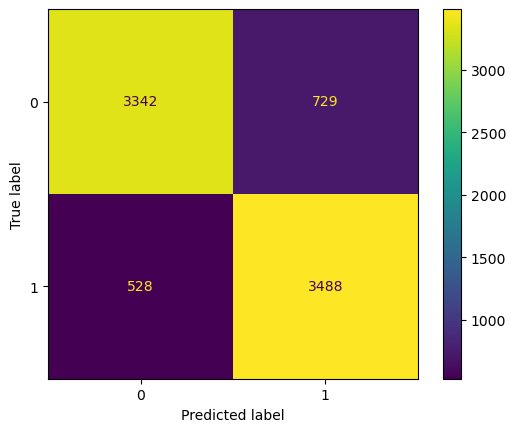

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict
y_pred = model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

### Confusion Matrix (Clean and Labeled)

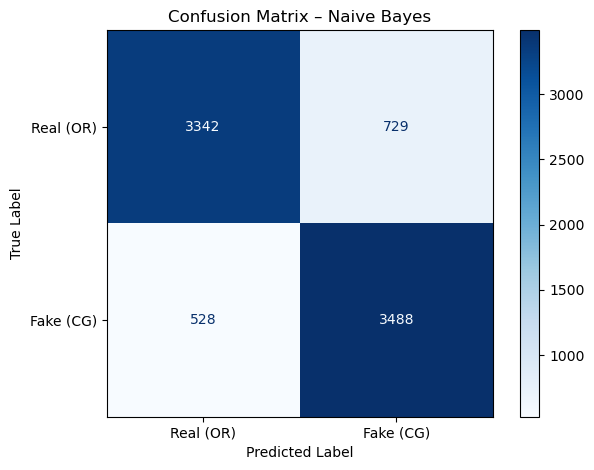

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real (OR)', 'Fake (CG)'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix – Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

### Accuracy Bar Chart Comparing Models

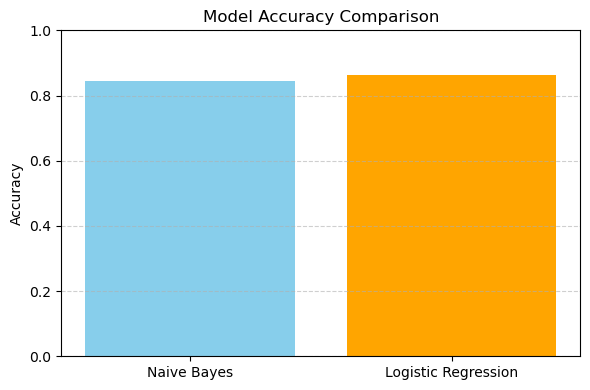

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Example: compare two models
nb_accuracy = accuracy_score(y_test, model.predict(X_test))  # Naive Bayes
lr_accuracy = accuracy_score(y_test, lr_model.predict(X_test))  # Logistic Regression

# Bar chart
plt.figure(figsize=(6, 4))
plt.bar(['Naive Bayes', 'Logistic Regression'], [nb_accuracy, lr_accuracy], color=['skyblue', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Word Cloud (Optional, for Poster Visual Appeal)

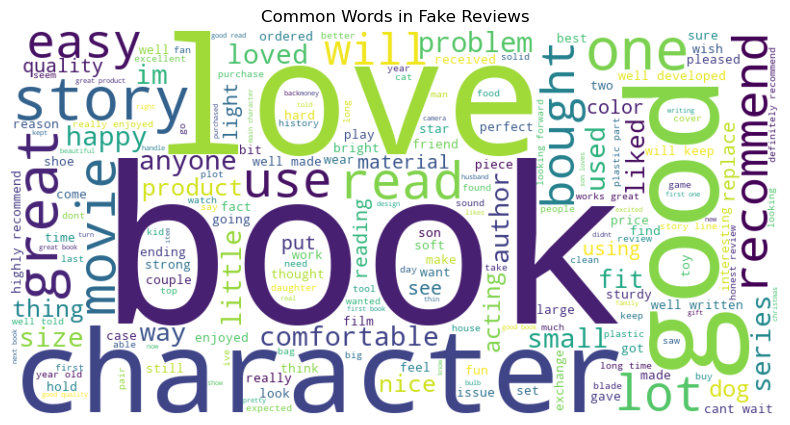

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for fake reviews only
fake_reviews = df[df['label'] == 1]['cleaned_text'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Words in Fake Reviews')
plt.show()